In [1]:
import numpy as np
import sympy as sp
from sympy import nroots
from matplotlib import pyplot as plt

In [2]:
x,y,z=sp.symbols('x,y,z')# 

In [3]:
r=sp.symbols('r')
#r=sp.sqrt(x**2+y**2)
k=5
a=k/10
l0=4
showc=1

In [4]:
F1=-k*(r-l0)+a*(r-l0)**3 #Ley de hooke con un termino no lineal
UU=-sp.integrate(F1,r) #Energia potencial del sistema
UU=UU.subs(r,sp.sqrt(x**2+y**2)) 
UUU=sp.lambdify([x,y],UU)
roots=nroots(F1) ##Raices donde existe un cambio de direccion d fuerza

In [5]:
roots# radios

[0.837722339831621, 4.00000000000000, 7.16227766016838]

Radios y campo vectorial de fuerzas

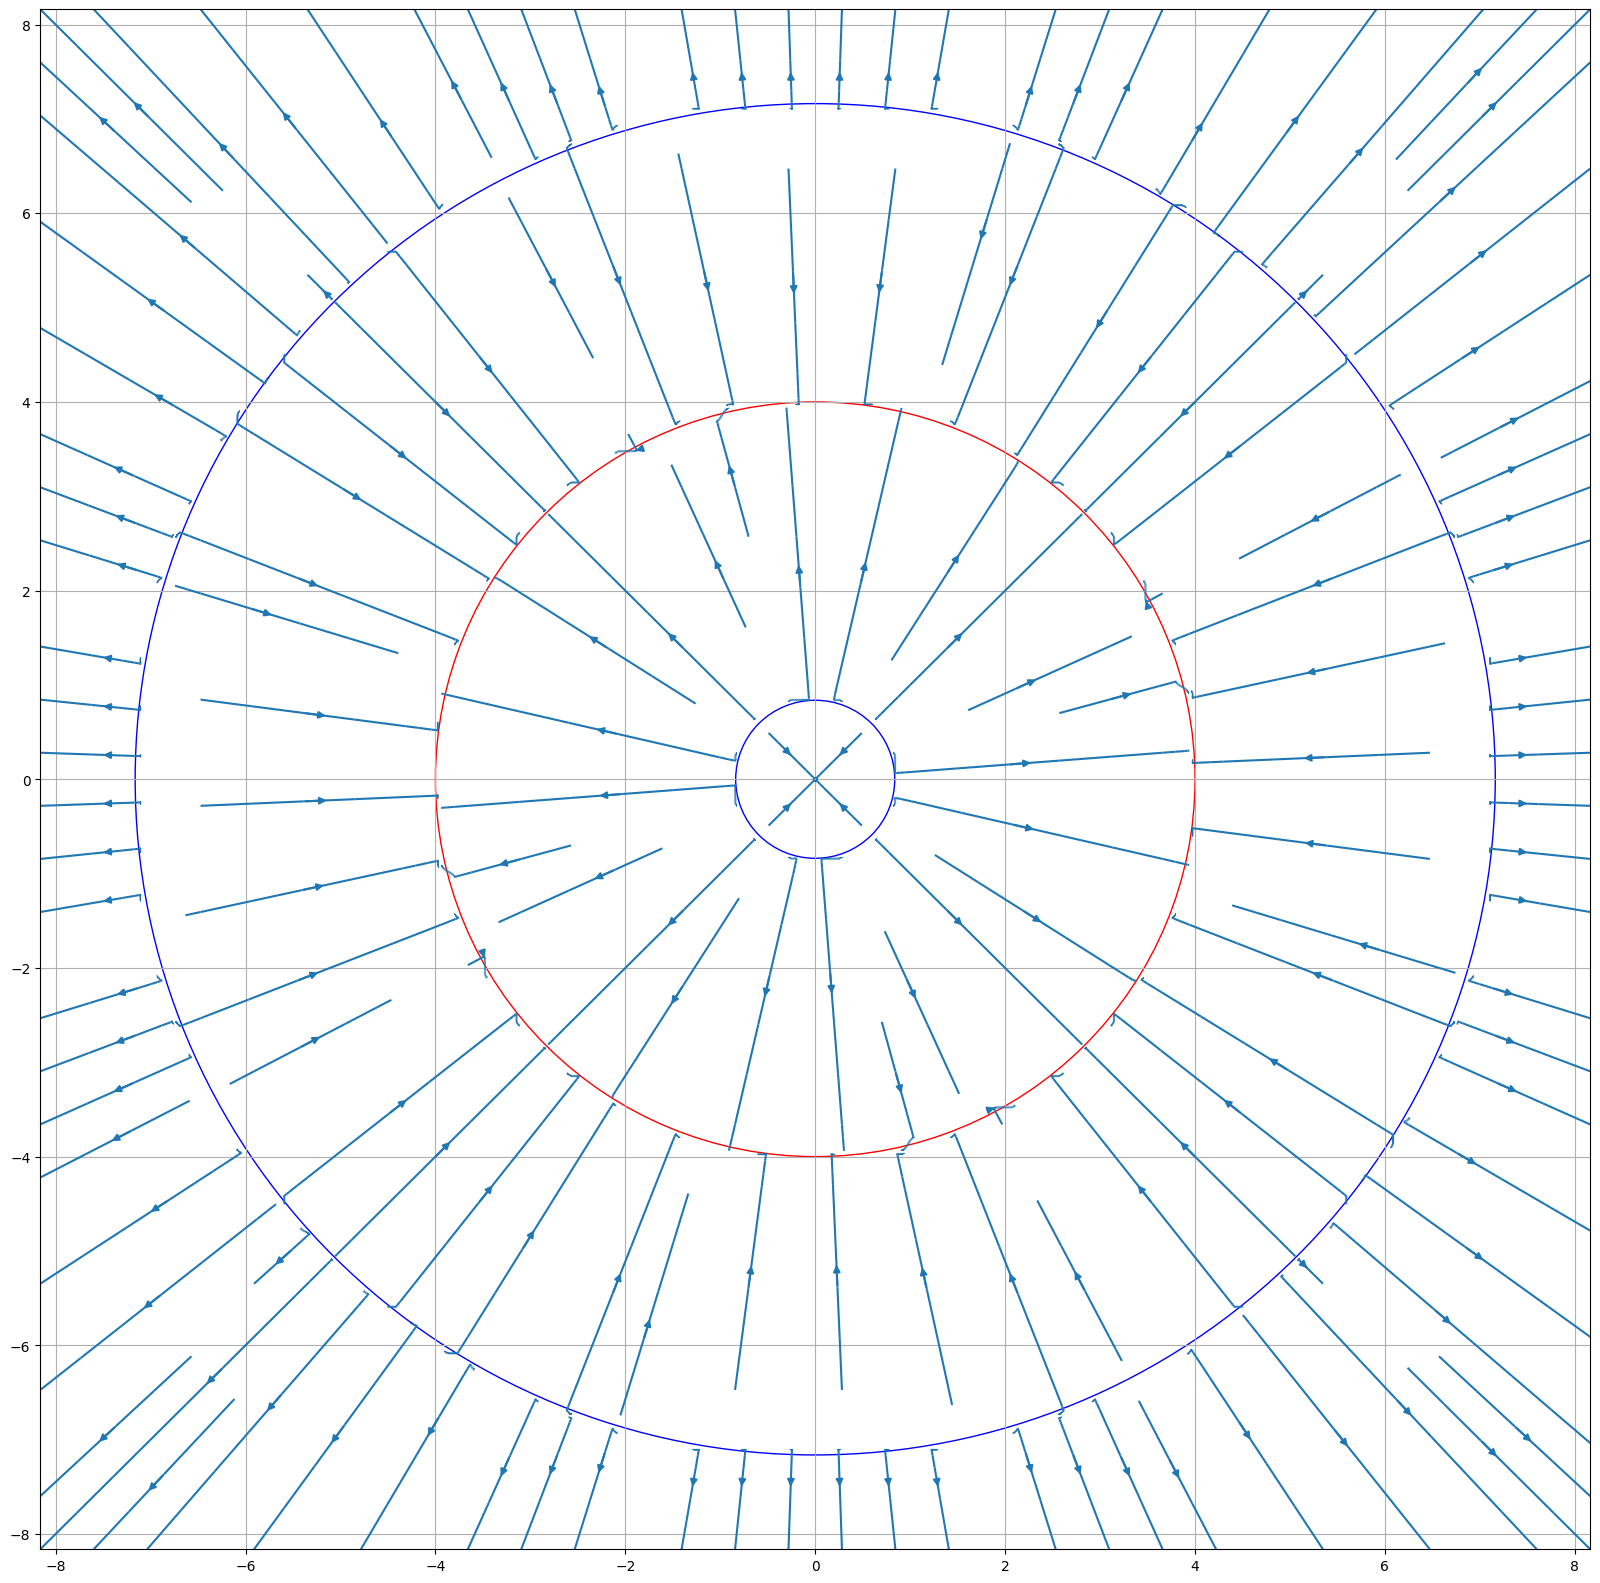

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))
ffx=F1*(x/r) ## Fuerza en x
ffy=F1*(y/r) ## Fuerza en y
Fx=ffx.subs(r,sp.sqrt(x**2+y**2)) #R-> sqrt(x**2+y**2)
Fy=ffy.subs(r,sp.sqrt(x**2+y**2)) #R-> sqrt(x**2+y**2)

xx=np.linspace(-float(max(roots))-1,float(max(roots))+1,100) ## Meshgrid
X,Y=np.meshgrid(xx,xx)

fx=sp.lambdify([x,y],Fx)
fy=sp.lambdify([x,y],Fy)

FXX=fx(X,Y)
FYY=fy(X,Y)
FF=np.sqrt(FXX**2+FYY**2) ##Magnitud de la fuerza


#ax.quiver(X,Y,FXX/FF,FYY/FF) #Campo vectorial
if showc==1: ##GRaficas de los radios (raices)
    circle = plt.Circle((0,0), roots[0], color='b', fill=False)
    circle2 = plt.Circle((0,0), roots[1], color='r', fill=False)
    circle3=plt.Circle((0,0), roots[2], color='b', fill=False)
    ax.add_patch(circle)
    ax.add_patch(circle2)
    ax.add_patch(circle3)     
    ax = plt.gca()

ax.streamplot(X,Y,FXX/FF,FYY/FF)
#plt.axis('equal')
plt.grid('on')

In [7]:
from matplotlib.animation import FuncAnimation
from IPython import display


Runge Kutta 4to orden de ecuaciones diferenciales acopladas 

In [8]:
t,y,v_y,x,v_x=sp.symbols('t,y,v_y,x,v_x') #Variables simbolicas

In [9]:
def d2ydt2(y,f1,f2):
    return np.array([y[2],y[3],f2(y[0],y[1],y[2],y[3],y[4]),f1(y[0],y[1],y[2],y[3],y[4]),1])

def RK42(x0,y0,vx0,vy0,dt,tf,f,g):
    #Vectorizcion de funciones
    f1=sp.lambdify([y,x,v_y,v_x,t],f)
    f2=sp.lambdify([y,x,v_y,v_x,t],g)
    ts=np.arange(0,tf,dt)
    n=len(ts)
    ##Posiciones
    ys=ts*0
    xs=ts*0
    #zs=ts*0
    ##Velocidades
    vys=ts*0
    vxs=ts*0
    #vzs=ts*0
    ##aceleraciones
    ays=ts*0
    axs=ts*0
    #azs=ts*0
    ##Condiciones iniciales
    ys[0]=y0
    xs[0]=x0
    
    vys[0]=vy0
    vxs[0]=vx0
    
    
    for i in range(0,n-1):
        #Runge Kutta
        z0=np.array([ys[i],xs[i],vys[i],vxs[i],ts[i]])
        k1=d2ydt2(z0,f1,f2)
        k2=d2ydt2(z0+(dt*k1)/2,f1,f2)
        k3=d2ydt2(z0+(dt*k2)/2,f1,f2)
        k4=d2ydt2(z0+dt*k3,f1,f2)
        
        #Vectores de x y vy vx ax ay
        ys[i+1]=ys[i]+(dt/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        xs[i+1]=xs[i]+(dt/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
        vys[i+1]=vys[i]+(dt/6)*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
        vxs[i+1]=vxs[i]+(dt/6)*(k1[3]+2*k2[3]+2*k3[3]+k4[3])
         
        ays[i]=f2(ys[i],xs[i],vys[i],vxs[i],ts[i])
        axs[i]=f1(ys[i],xs[i],vys[i],vxs[i],ts[i])
        
    fig2=plt.figure(figsize=(10,10))
    plt.plot(xs,ys,color='black',label='Posicion x vs y')
    #plt.plot(vxs,vys,color='blue',label='Velocidad x vs velocidad y')
    #plt.plot(axs,ays,color='red',label='Aceleracion x vs aceleracion y')
    ll=250
    plt.quiver(xs[1:-1:ll],ys[1:-1:ll],axs[1:-1:ll],ays[1:-1:ll],color='red',label='Aceleracion')
    plt.quiver(xs[1:-1:ll],ys[1:-1:ll],vxs[1:-1:ll],vys[1:-1:ll],color='blue',label='Velocidad')
    plt.axis('equal')
    plt.grid('on')
    plt.legend()
    plt.show()
    
    fig3=plt.figure(figsize=(10,10))
    plt.plot(ts,np.sqrt(xs**2+ys**2),color='black',label='r vs tiempo')
    plt.plot(ts,np.sqrt(axs**2+ays**2),color='red',label='aceleracion neta vs tiempo')
    plt.plot(ts,np.sqrt(vxs**2+vys**2),color='blue',label='Velocidad neta vs tiempo')
    #plt.plot(ts,vxs,color='red',label='Velocidad')
    #plt.plot(ts,axs,color='blue',label='aceleracion')
    plt.xlabel('tiempo(s)')
    plt.axis('equal')
    plt.grid('on')
    plt.legend()
    plt.show()
    return ts,ys,xs,vys,vxs,axs,ays

Caso arbitrario 1

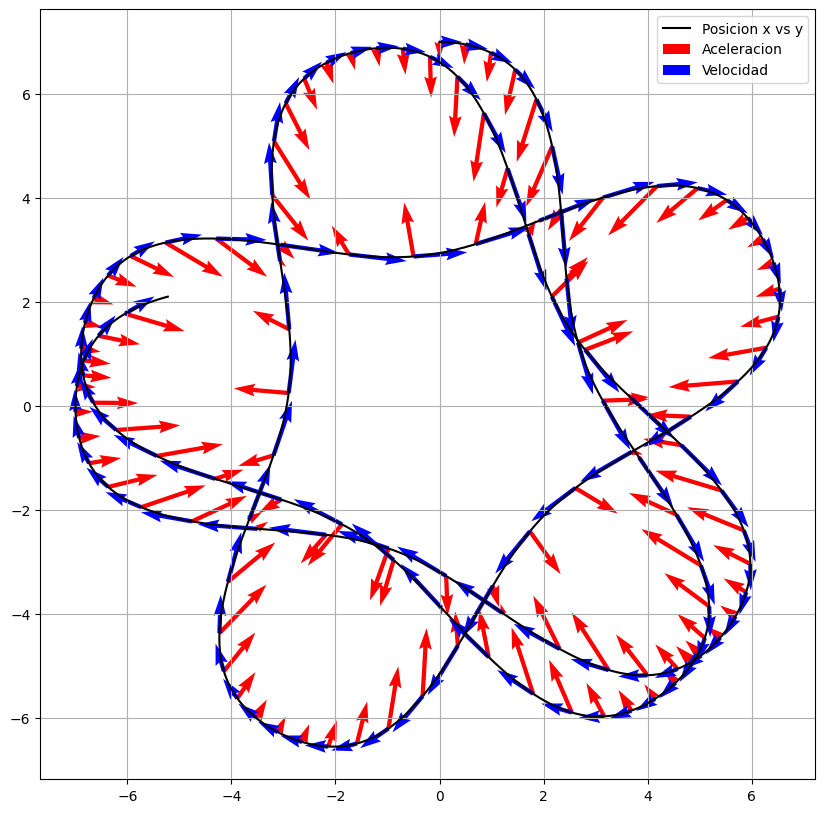

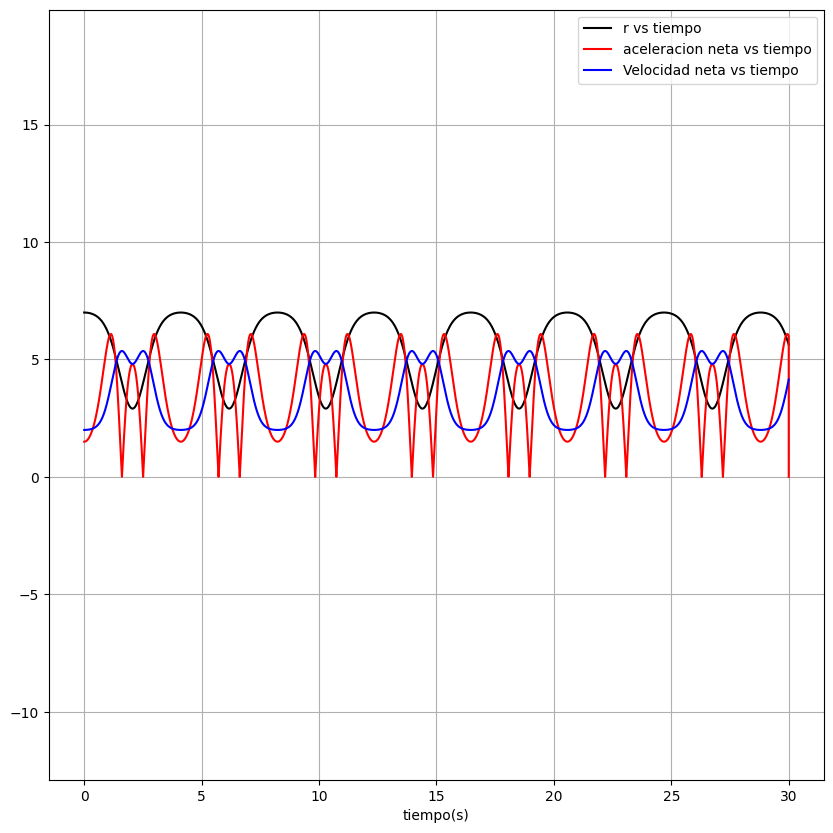

In [12]:
ts,ys,xs,vys,vxs,axs,ays=RK42(0,7,2,0,0.001,30,Fx,Fy) # RK42(y0,x0,vx0,vy0,dt,tf,f,g)

Conservacion de energía

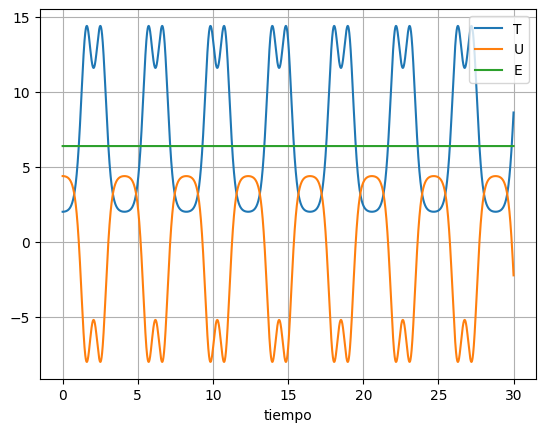

In [13]:
U=UUU(xs,ys)
T=1/2*(vxs**2+vys**2)
plt.plot(ts,T,label='T')
plt.plot(ts,U,label='U')
plt.plot(ts,T+U,label='E')
plt.xlabel('tiempo')
plt.legend()
plt.grid('on')

Estrella de cinco picos

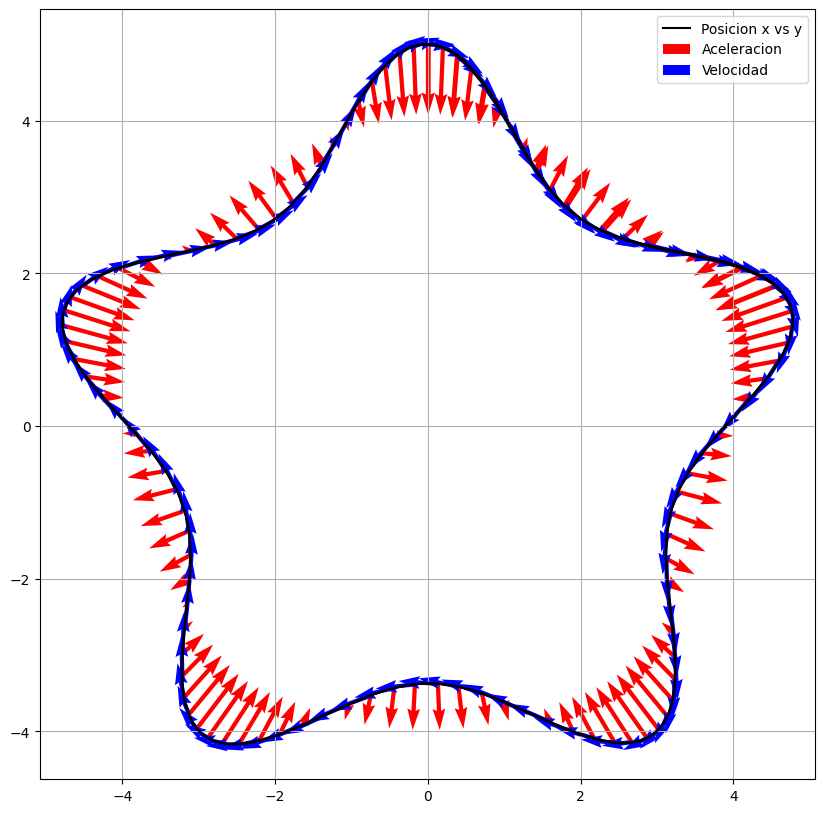

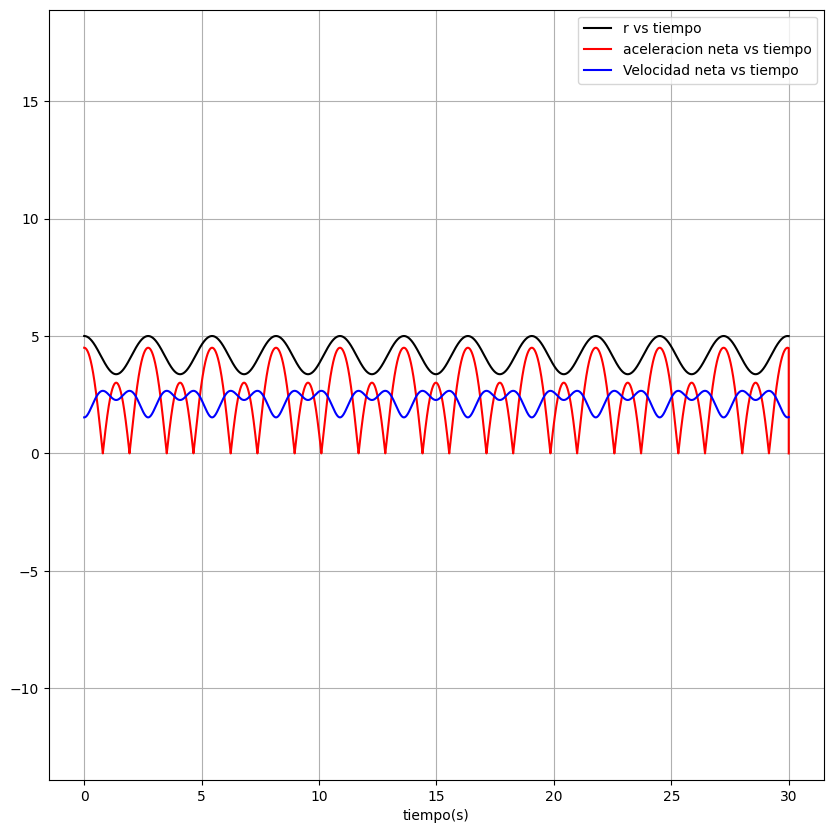

In [14]:
ts,ys,xs,vys,vxs,axs,ays=RK42(0,5,1.535,0,0.001,30,Fx,Fy) # RK42(y0,x0,vx0,vy0,dt,tf,f,g)

Conservacion de energía estrella de cinco picos

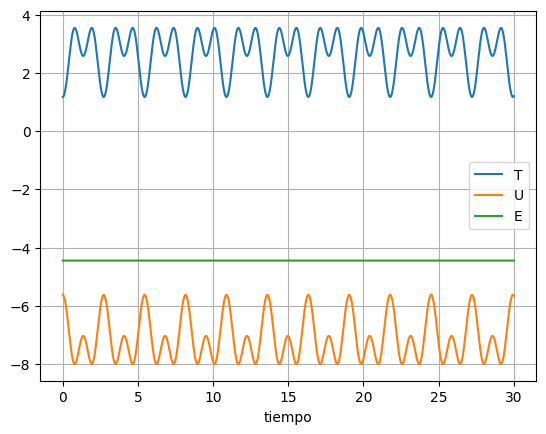

In [15]:
U=UUU(xs,ys)
T=1/2*(vxs**2+vys**2)
plt.plot(ts,T,label='T')
plt.plot(ts,U,label='U')
plt.plot(ts,T+U,label='E')
plt.xlabel('tiempo')
plt.legend()
plt.grid('on')

Caso arbitrario 1

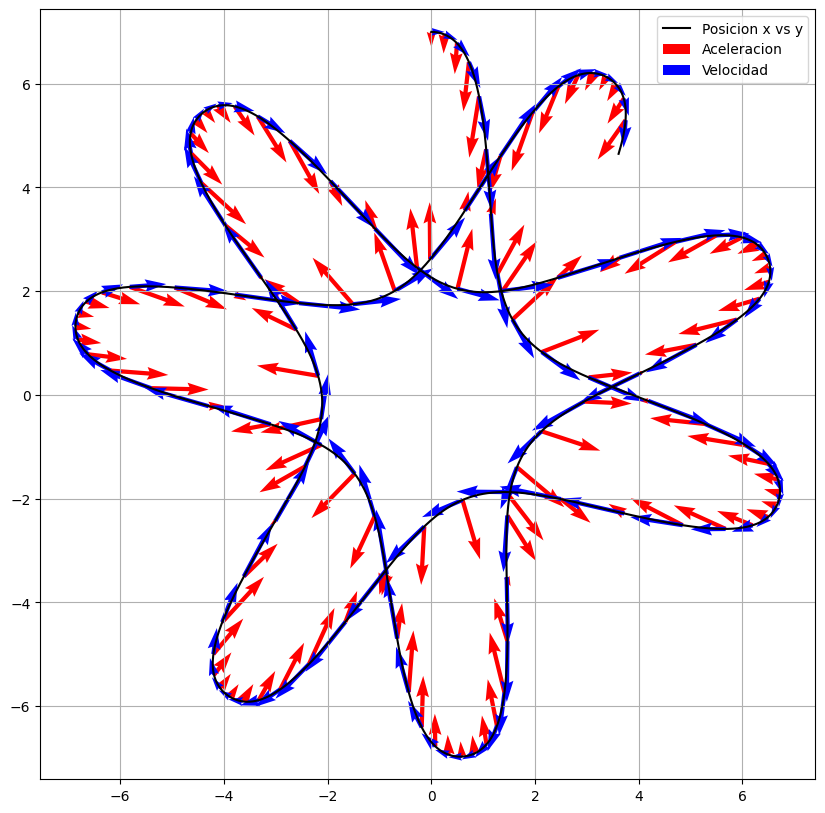

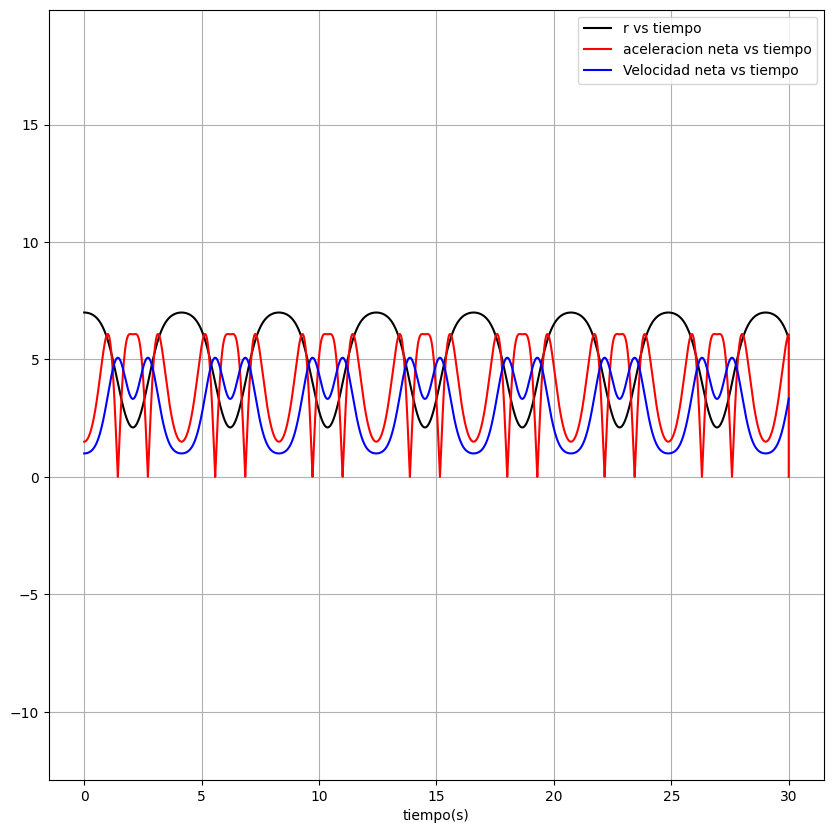

In [16]:
ts,ys,xs,vys,vxs,axs,ays=RK42(0,7,1.,0,0.001,30,Fx,Fy) # RK42(y0,x0,vx0,vy0,dt,tf,f,g)

Conservacion de energía caso arbitrario 2

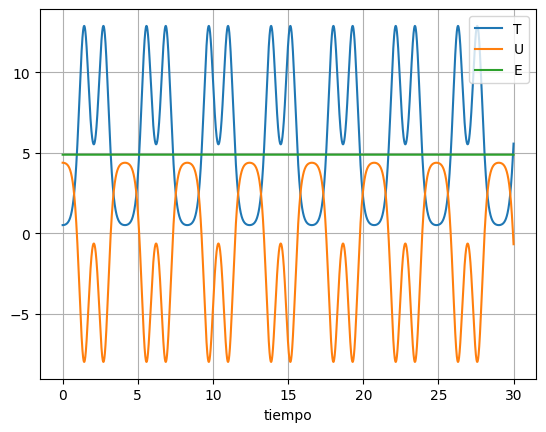

In [18]:
U=UUU(xs,ys)
T=1/2*(vxs**2+vys**2)
plt.plot(ts,T,label='T')
plt.plot(ts,U,label='U')
plt.plot(ts,T+U,label='E')
plt.xlabel('tiempo')
plt.legend()
plt.grid('on')

##Animacion##

In [19]:
fig=plt.figure(figsize=(10, 10))
#plt.plot(0,0,lw=1000,color='red')
plt.grid('on')
#plt.axis('equal')
plt.xlim(min(xs)-1,max(xs)+1)
plt.ylim(min(ys),max(ys))

resorte,=plt.plot([],[],color='black', label='posicion')

pp,=plt.plot([],[],'ro',label='Punta del resorte')
ppt,=plt.plot([],[],c='blue',label='resorte')
plt.legend()


def animate(i):
    resorte.set_data((xs[0:i],ys[0:i]))
    pp.set_data((xs[i-1],ys[i-1]))
    ppt.set_data(([0,xs[i-1]],[0,ys[i-1]]))
    
n=150
fr=np.arange(0, len(ts)+1,n)
anim=FuncAnimation(fig,animate,frames=fr,interval=20)
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()